In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: XRP-USD
Start: 2021-01-22 18:30:00+00:00, End: 2021-03-22 14:30:00+00:00
Training data: 1274 
Tsesting data: 1275 


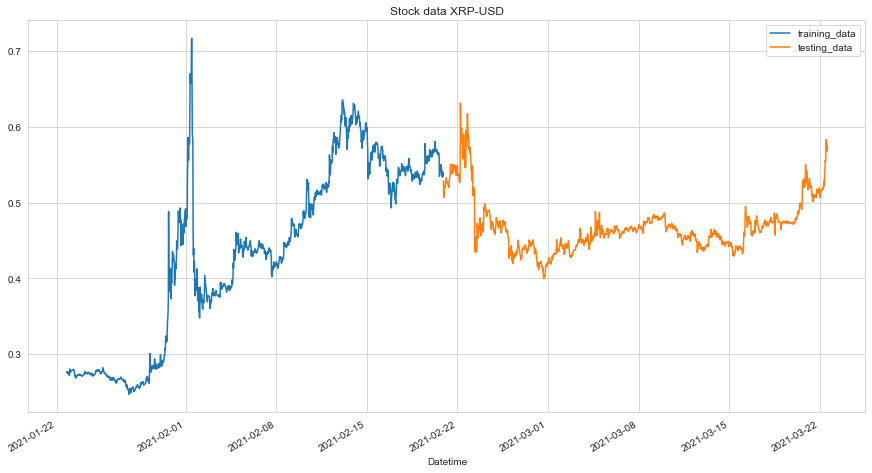

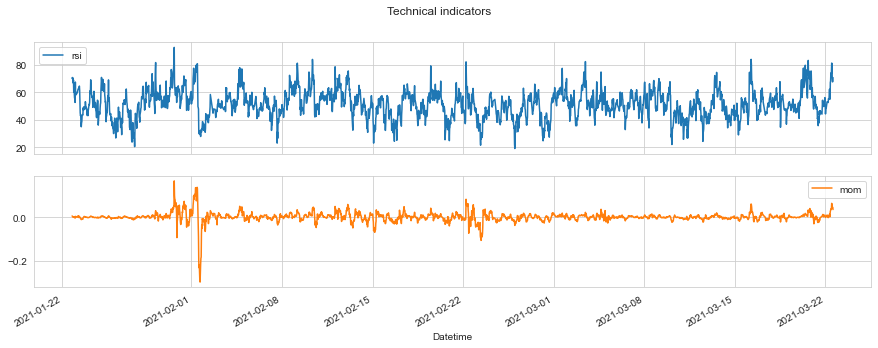

In [2]:
stock_name = 'xrp-usd'.upper()
industry = 'Cryptocurrency'
stock_data = pd.read_csv(f'data/{stock_name}.csv', index_col=['Datetime'], parse_dates=True)
n_train = len(stock_data)//2

train_data = stock_data.iloc[:n_train]
test_data = stock_data.iloc[n_train:]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1531.82, duration: 0:00:00.276057
episode: 2/2000, episode end value: 1454.24, duration: 0:00:00.262062
episode: 3/2000, episode end value: 1432.75, duration: 0:00:00.272058
episode: 4/2000, episode end value: 1535.48, duration: 0:00:00.264061
episode: 5/2000, episode end value: 1424.52, duration: 0:00:00.262056
episode: 6/2000, episode end value: 1466.97, duration: 0:00:00.265056
episode: 7/2000, episode end value: 1619.49, duration: 0:00:00.271058
episode: 8/2000, episode end value: 1453.75, duration: 0:00:00.299067
episode: 9/2000, episode end value: 1387.28, duration: 0:00:00.326072
episode: 10/2000, episode end value: 1445.23, duration: 0:00:00.361079
episode: 11/2000, episode end value: 1490.63, duration: 0:00:00.409092
episode: 12/2000, episode end value: 1510.80, duration: 0:00:00.470108
episode: 13/2000, episode end value: 1536.41, duration: 0:00:00.369081
episode: 14/2000, episode end value: 1541.38, duration: 0:00:00.367082
episode: 15/200

episode: 117/2000, episode end value: 1426.10, duration: 0:00:00.280059
episode: 118/2000, episode end value: 1472.35, duration: 0:00:00.292069
episode: 119/2000, episode end value: 1515.06, duration: 0:00:00.295065
episode: 120/2000, episode end value: 1476.59, duration: 0:00:00.285063
episode: 121/2000, episode end value: 1529.88, duration: 0:00:00.277060
episode: 122/2000, episode end value: 1470.71, duration: 0:00:00.279058
episode: 123/2000, episode end value: 1556.12, duration: 0:00:00.272064
episode: 124/2000, episode end value: 1535.23, duration: 0:00:00.266059
episode: 125/2000, episode end value: 1564.38, duration: 0:00:00.243053
episode: 126/2000, episode end value: 1602.94, duration: 0:00:00.250056
episode: 127/2000, episode end value: 1584.58, duration: 0:00:00.255058
episode: 128/2000, episode end value: 1448.56, duration: 0:00:00.259056
episode: 129/2000, episode end value: 1756.07, duration: 0:00:00.246053
episode: 130/2000, episode end value: 1427.39, duration: 0:00:00

episode: 231/2000, episode end value: 1458.60, duration: 0:00:00.275064
episode: 232/2000, episode end value: 1525.12, duration: 0:00:00.266058
episode: 233/2000, episode end value: 1411.29, duration: 0:00:00.261058
episode: 234/2000, episode end value: 1578.57, duration: 0:00:00.236053
episode: 235/2000, episode end value: 1562.91, duration: 0:00:00.261056
episode: 236/2000, episode end value: 1428.73, duration: 0:00:00.260061
episode: 237/2000, episode end value: 1536.94, duration: 0:00:00.292066
episode: 238/2000, episode end value: 1383.81, duration: 0:00:00.308068
episode: 239/2000, episode end value: 1537.69, duration: 0:00:00.302068
episode: 240/2000, episode end value: 1500.59, duration: 0:00:00.305069
episode: 241/2000, episode end value: 1590.91, duration: 0:00:00.292065
episode: 242/2000, episode end value: 1592.54, duration: 0:00:00.292067
episode: 243/2000, episode end value: 1560.88, duration: 0:00:00.308070
episode: 244/2000, episode end value: 1542.60, duration: 0:00:00

episode: 345/2000, episode end value: 1539.21, duration: 0:00:00.328071
episode: 346/2000, episode end value: 1545.44, duration: 0:00:00.306067
episode: 347/2000, episode end value: 1477.09, duration: 0:00:00.335075
episode: 348/2000, episode end value: 1460.90, duration: 0:00:00.331076
episode: 349/2000, episode end value: 1461.62, duration: 0:00:00.394086
episode: 350/2000, episode end value: 1611.64, duration: 0:00:00.335071
episode: 351/2000, episode end value: 1477.68, duration: 0:00:00.320075
episode: 352/2000, episode end value: 1543.83, duration: 0:00:00.285059
episode: 353/2000, episode end value: 1533.73, duration: 0:00:00.312070
episode: 354/2000, episode end value: 1467.06, duration: 0:00:00.299066
episode: 355/2000, episode end value: 1447.98, duration: 0:00:00.290067
episode: 356/2000, episode end value: 1710.03, duration: 0:00:00.253057
episode: 357/2000, episode end value: 1416.71, duration: 0:00:00.266057
episode: 358/2000, episode end value: 1381.02, duration: 0:00:00

episode: 459/2000, episode end value: 1493.90, duration: 0:00:00.271059
episode: 460/2000, episode end value: 1517.78, duration: 0:00:00.265070
episode: 461/2000, episode end value: 1449.04, duration: 0:00:00.246060
episode: 462/2000, episode end value: 1498.68, duration: 0:00:00.268058
episode: 463/2000, episode end value: 1387.57, duration: 0:00:00.300065
episode: 464/2000, episode end value: 1733.75, duration: 0:00:00.268060
episode: 465/2000, episode end value: 1554.04, duration: 0:00:00.270060
episode: 466/2000, episode end value: 1549.33, duration: 0:00:00.263065
episode: 467/2000, episode end value: 1517.86, duration: 0:00:00.283058
episode: 468/2000, episode end value: 1542.19, duration: 0:00:00.294066
episode: 469/2000, episode end value: 1446.87, duration: 0:00:00.317068
episode: 470/2000, episode end value: 1562.89, duration: 0:00:00.278062
episode: 471/2000, episode end value: 1497.71, duration: 0:00:00.252057
episode: 472/2000, episode end value: 1475.45, duration: 0:00:00

episode: 573/2000, episode end value: 1545.18, duration: 0:00:00.295065
episode: 574/2000, episode end value: 1500.53, duration: 0:00:00.299066
episode: 575/2000, episode end value: 1550.74, duration: 0:00:00.316075
episode: 576/2000, episode end value: 1477.08, duration: 0:00:00.299066
episode: 577/2000, episode end value: 1470.60, duration: 0:00:00.294070
episode: 578/2000, episode end value: 1590.20, duration: 0:00:00.297065
episode: 579/2000, episode end value: 1457.64, duration: 0:00:00.328072
episode: 580/2000, episode end value: 1465.98, duration: 0:00:00.296068
episode: 581/2000, episode end value: 1423.49, duration: 0:00:00.305068
episode: 582/2000, episode end value: 1563.93, duration: 0:00:00.299065
episode: 583/2000, episode end value: 1471.14, duration: 0:00:00.288065
episode: 584/2000, episode end value: 1517.94, duration: 0:00:00.287065
episode: 585/2000, episode end value: 1559.69, duration: 0:00:00.274061
episode: 586/2000, episode end value: 1610.08, duration: 0:00:00

episode: 687/2000, episode end value: 1455.48, duration: 0:00:00.299066
episode: 688/2000, episode end value: 1608.86, duration: 0:00:00.313072
episode: 689/2000, episode end value: 1434.98, duration: 0:00:00.321072
episode: 690/2000, episode end value: 1400.44, duration: 0:00:00.326072
episode: 691/2000, episode end value: 1499.51, duration: 0:00:00.346080
episode: 692/2000, episode end value: 1618.15, duration: 0:00:00.316074
episode: 693/2000, episode end value: 1541.87, duration: 0:00:00.319071
episode: 694/2000, episode end value: 1518.58, duration: 0:00:00.375079
episode: 695/2000, episode end value: 1507.19, duration: 0:00:00.414093
episode: 696/2000, episode end value: 1510.72, duration: 0:00:00.365080
episode: 697/2000, episode end value: 1504.07, duration: 0:00:00.366088
episode: 698/2000, episode end value: 1522.54, duration: 0:00:00.318067
episode: 699/2000, episode end value: 1522.82, duration: 0:00:00.283066
episode: 700/2000, episode end value: 1463.42, duration: 0:00:00

episode: 801/2000, episode end value: 1513.84, duration: 0:00:00.269173
episode: 802/2000, episode end value: 1543.56, duration: 0:00:00.255059
episode: 803/2000, episode end value: 1775.24, duration: 0:00:00.255056
episode: 804/2000, episode end value: 1609.14, duration: 0:00:00.238053
episode: 805/2000, episode end value: 1436.91, duration: 0:00:00.305067
episode: 806/2000, episode end value: 1385.30, duration: 0:00:00.343075
episode: 807/2000, episode end value: 1414.79, duration: 0:00:00.332076
episode: 808/2000, episode end value: 1427.29, duration: 0:00:00.409089
episode: 809/2000, episode end value: 1556.83, duration: 0:00:00.338076
episode: 810/2000, episode end value: 1495.89, duration: 0:00:00.329070
episode: 811/2000, episode end value: 1539.61, duration: 0:00:00.291186
episode: 812/2000, episode end value: 1508.64, duration: 0:00:00.338074
episode: 813/2000, episode end value: 1479.67, duration: 0:00:00.296067
episode: 814/2000, episode end value: 1516.17, duration: 0:00:00

episode: 915/2000, episode end value: 1429.60, duration: 0:00:00.288068
episode: 916/2000, episode end value: 1587.18, duration: 0:00:00.236052
episode: 917/2000, episode end value: 1428.80, duration: 0:00:00.237055
episode: 918/2000, episode end value: 1408.79, duration: 0:00:00.240053
episode: 919/2000, episode end value: 1384.72, duration: 0:00:00.253058
episode: 920/2000, episode end value: 1559.31, duration: 0:00:00.224049
episode: 921/2000, episode end value: 1663.64, duration: 0:00:00.234053
episode: 922/2000, episode end value: 1433.94, duration: 0:00:00.277064
episode: 923/2000, episode end value: 1535.77, duration: 0:00:00.256055
episode: 924/2000, episode end value: 1479.38, duration: 0:00:00.260060
episode: 925/2000, episode end value: 1552.89, duration: 0:00:00.261058
episode: 926/2000, episode end value: 1442.49, duration: 0:00:00.260061
episode: 927/2000, episode end value: 1484.44, duration: 0:00:00.232046
episode: 928/2000, episode end value: 1587.69, duration: 0:00:00

episode: 1029/2000, episode end value: 1544.70, duration: 0:00:00.279060
episode: 1030/2000, episode end value: 1472.99, duration: 0:00:00.264058
episode: 1031/2000, episode end value: 1386.60, duration: 0:00:00.279062
episode: 1032/2000, episode end value: 1760.51, duration: 0:00:00.246054
episode: 1033/2000, episode end value: 1393.86, duration: 0:00:00.300067
episode: 1034/2000, episode end value: 1598.59, duration: 0:00:00.247034
episode: 1035/2000, episode end value: 1522.16, duration: 0:00:00.266063
episode: 1036/2000, episode end value: 1522.32, duration: 0:00:00.313085
episode: 1037/2000, episode end value: 1509.45, duration: 0:00:00.287790
episode: 1038/2000, episode end value: 1499.22, duration: 0:00:00.292314
episode: 1039/2000, episode end value: 1550.19, duration: 0:00:00.263057
episode: 1040/2000, episode end value: 1538.96, duration: 0:00:00.253057
episode: 1041/2000, episode end value: 1493.74, duration: 0:00:00.266061
episode: 1042/2000, episode end value: 1481.16, dur

episode: 1142/2000, episode end value: 1384.21, duration: 0:00:00.285064
episode: 1143/2000, episode end value: 1430.68, duration: 0:00:00.311066
episode: 1144/2000, episode end value: 1565.94, duration: 0:00:00.239055
episode: 1145/2000, episode end value: 1505.04, duration: 0:00:00.251049
episode: 1146/2000, episode end value: 1573.85, duration: 0:00:00.234052
episode: 1147/2000, episode end value: 1510.41, duration: 0:00:00.244054
episode: 1148/2000, episode end value: 1519.01, duration: 0:00:00.215049
episode: 1149/2000, episode end value: 1565.14, duration: 0:00:00.218048
episode: 1150/2000, episode end value: 1574.77, duration: 0:00:00.236048
episode: 1151/2000, episode end value: 1522.84, duration: 0:00:00.243055
episode: 1152/2000, episode end value: 1545.58, duration: 0:00:00.245059
episode: 1153/2000, episode end value: 1468.24, duration: 0:00:00.279061
episode: 1154/2000, episode end value: 1479.75, duration: 0:00:00.249054
episode: 1155/2000, episode end value: 1551.25, dur

episode: 1255/2000, episode end value: 1458.36, duration: 0:00:00.252057
episode: 1256/2000, episode end value: 1598.60, duration: 0:00:00.249059
episode: 1257/2000, episode end value: 1418.57, duration: 0:00:00.276062
episode: 1258/2000, episode end value: 1520.49, duration: 0:00:00.271061
episode: 1259/2000, episode end value: 1526.26, duration: 0:00:00.274061
episode: 1260/2000, episode end value: 1648.10, duration: 0:00:00.267059
episode: 1261/2000, episode end value: 1733.13, duration: 0:00:00.243055
episode: 1262/2000, episode end value: 1509.09, duration: 0:00:00.282068
episode: 1263/2000, episode end value: 1395.60, duration: 0:00:00.280058
episode: 1264/2000, episode end value: 1489.86, duration: 0:00:00.344607
episode: 1265/2000, episode end value: 1543.32, duration: 0:00:00.326501
episode: 1266/2000, episode end value: 1484.68, duration: 0:00:00.331610
episode: 1267/2000, episode end value: 1505.15, duration: 0:00:00.293064
episode: 1268/2000, episode end value: 1552.91, dur

episode: 1368/2000, episode end value: 1494.55, duration: 0:00:00.329510
episode: 1369/2000, episode end value: 1496.88, duration: 0:00:00.319069
episode: 1370/2000, episode end value: 1503.32, duration: 0:00:00.303066
episode: 1371/2000, episode end value: 1483.13, duration: 0:00:00.305069
episode: 1372/2000, episode end value: 1529.04, duration: 0:00:00.287065
episode: 1373/2000, episode end value: 1576.27, duration: 0:00:00.280064
episode: 1374/2000, episode end value: 1500.69, duration: 0:00:00.342077
episode: 1375/2000, episode end value: 1511.24, duration: 0:00:00.377085
episode: 1376/2000, episode end value: 1537.56, duration: 0:00:00.272058
episode: 1377/2000, episode end value: 1559.02, duration: 0:00:00.289067
episode: 1378/2000, episode end value: 1478.84, duration: 0:00:00.318074
episode: 1379/2000, episode end value: 1487.43, duration: 0:00:00.331068
episode: 1380/2000, episode end value: 1458.80, duration: 0:00:00.326076
episode: 1381/2000, episode end value: 1572.83, dur

episode: 1481/2000, episode end value: 1482.64, duration: 0:00:00.264060
episode: 1482/2000, episode end value: 1488.71, duration: 0:00:00.281060
episode: 1483/2000, episode end value: 1474.71, duration: 0:00:00.256058
episode: 1484/2000, episode end value: 1536.39, duration: 0:00:00.240055
episode: 1485/2000, episode end value: 1465.98, duration: 0:00:00.254056
episode: 1486/2000, episode end value: 1466.48, duration: 0:00:00.277081
episode: 1487/2000, episode end value: 1456.96, duration: 0:00:00.312071
episode: 1488/2000, episode end value: 1506.25, duration: 0:00:00.242836
episode: 1489/2000, episode end value: 1466.47, duration: 0:00:00.249230
episode: 1490/2000, episode end value: 1467.76, duration: 0:00:00.251069
episode: 1491/2000, episode end value: 1538.72, duration: 0:00:00.240764
episode: 1492/2000, episode end value: 1435.94, duration: 0:00:00.240052
episode: 1493/2000, episode end value: 1477.82, duration: 0:00:00.234056
episode: 1494/2000, episode end value: 1528.88, dur

episode: 1594/2000, episode end value: 1463.77, duration: 0:00:00.231040
episode: 1595/2000, episode end value: 1388.65, duration: 0:00:00.242246
episode: 1596/2000, episode end value: 1434.67, duration: 0:00:00.242078
episode: 1597/2000, episode end value: 1493.29, duration: 0:00:00.224244
episode: 1598/2000, episode end value: 1511.94, duration: 0:00:00.231174
episode: 1599/2000, episode end value: 1504.39, duration: 0:00:00.223099
episode: 1600/2000, episode end value: 1451.60, duration: 0:00:00.230192
episode: 1601/2000, episode end value: 1403.50, duration: 0:00:00.246054
episode: 1602/2000, episode end value: 1433.37, duration: 0:00:00.234054
episode: 1603/2000, episode end value: 1444.77, duration: 0:00:00.249052
episode: 1604/2000, episode end value: 1647.88, duration: 0:00:00.221051
episode: 1605/2000, episode end value: 1674.93, duration: 0:00:00.250059
episode: 1606/2000, episode end value: 1435.16, duration: 0:00:00.230049
episode: 1607/2000, episode end value: 1448.09, dur

episode: 1707/2000, episode end value: 1640.29, duration: 0:00:00.243055
episode: 1708/2000, episode end value: 1505.26, duration: 0:00:00.288991
episode: 1709/2000, episode end value: 1504.76, duration: 0:00:00.283062
episode: 1710/2000, episode end value: 1551.96, duration: 0:00:00.292066
episode: 1711/2000, episode end value: 1573.87, duration: 0:00:00.249055
episode: 1712/2000, episode end value: 1501.03, duration: 0:00:00.286064
episode: 1713/2000, episode end value: 1498.39, duration: 0:00:00.278053
episode: 1714/2000, episode end value: 1513.56, duration: 0:00:00.255055
episode: 1715/2000, episode end value: 1557.38, duration: 0:00:00.277067
episode: 1716/2000, episode end value: 1551.22, duration: 0:00:00.266038
episode: 1717/2000, episode end value: 1489.31, duration: 0:00:00.276062
episode: 1718/2000, episode end value: 1528.24, duration: 0:00:00.250058
episode: 1719/2000, episode end value: 1527.07, duration: 0:00:00.263057
episode: 1720/2000, episode end value: 1525.31, dur

episode: 1820/2000, episode end value: 1523.30, duration: 0:00:00.253058
episode: 1821/2000, episode end value: 1640.91, duration: 0:00:00.250056
episode: 1822/2000, episode end value: 1490.87, duration: 0:00:00.274388
episode: 1823/2000, episode end value: 1487.80, duration: 0:00:00.255348
episode: 1824/2000, episode end value: 1507.05, duration: 0:00:00.235907
episode: 1825/2000, episode end value: 1686.00, duration: 0:00:00.238044
episode: 1826/2000, episode end value: 1513.94, duration: 0:00:00.269062
episode: 1827/2000, episode end value: 1499.90, duration: 0:00:00.253059
episode: 1828/2000, episode end value: 1500.50, duration: 0:00:00.257049
episode: 1829/2000, episode end value: 1479.15, duration: 0:00:00.246057
episode: 1830/2000, episode end value: 1560.08, duration: 0:00:00.248054
episode: 1831/2000, episode end value: 1595.80, duration: 0:00:00.226057
episode: 1832/2000, episode end value: 1489.43, duration: 0:00:00.249055
episode: 1833/2000, episode end value: 1483.64, dur

episode: 1933/2000, episode end value: 1647.52, duration: 0:00:00.214051
episode: 1934/2000, episode end value: 1590.85, duration: 0:00:00.211047
episode: 1935/2000, episode end value: 1574.49, duration: 0:00:00.218048
episode: 1936/2000, episode end value: 1501.50, duration: 0:00:00.248055
episode: 1937/2000, episode end value: 1503.72, duration: 0:00:00.228065
episode: 1938/2000, episode end value: 1574.86, duration: 0:00:00.217051
episode: 1939/2000, episode end value: 1687.80, duration: 0:00:00.234037
episode: 1940/2000, episode end value: 1493.05, duration: 0:00:00.282059
episode: 1941/2000, episode end value: 1491.24, duration: 0:00:00.248060
episode: 1942/2000, episode end value: 1511.99, duration: 0:00:00.219048
episode: 1943/2000, episode end value: 1507.77, duration: 0:00:00.229046
episode: 1944/2000, episode end value: 1513.73, duration: 0:00:00.246066
episode: 1945/2000, episode end value: 1501.16, duration: 0:00:00.269059
episode: 1946/2000, episode end value: 1598.92, dur

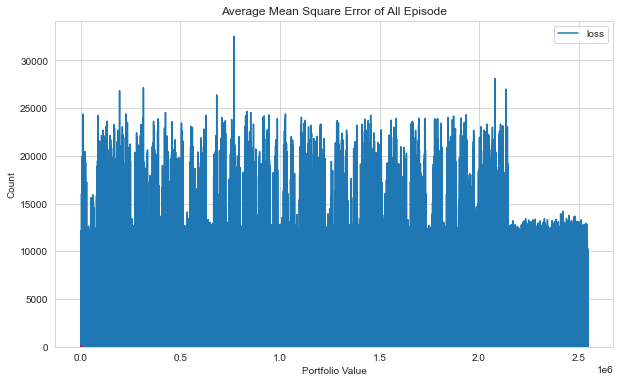

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

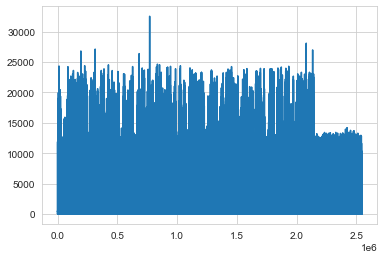

In [5]:
plt.plot(agent.model.losses)

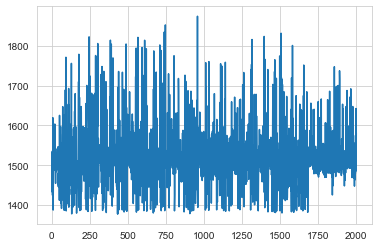

In [6]:
plt.plot(portfolio_value)

episode end value: 1146.59, duration: 0:00:00.167044
Sell: 651 times, Buy: 623 times


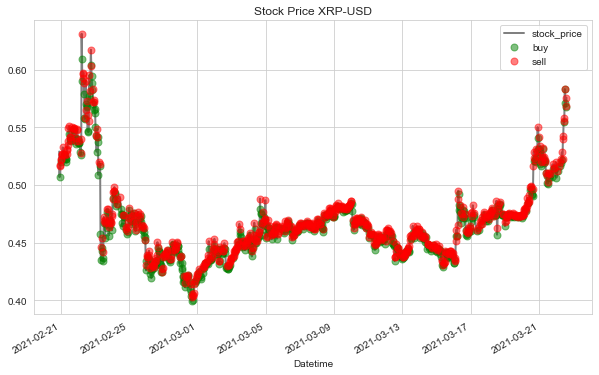

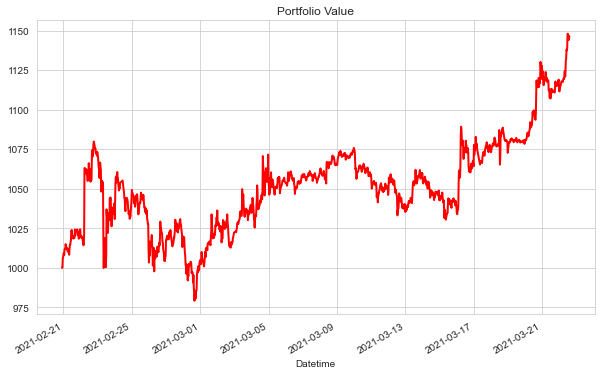

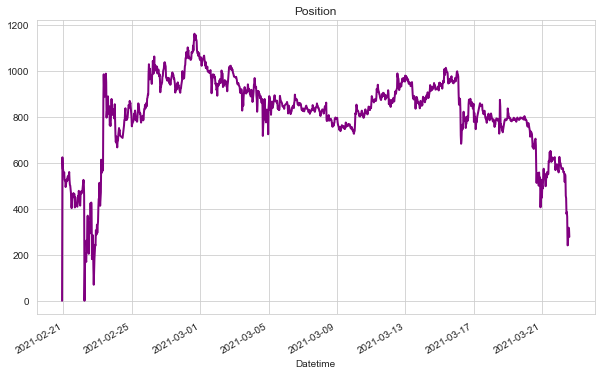

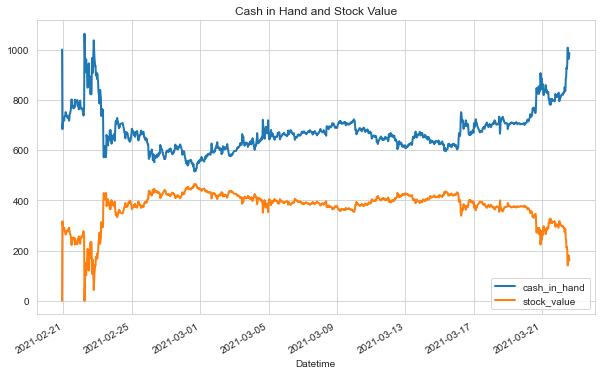

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: XRP-USD
Start: 2021-02-20 22:00:00+00:00  End: 2021-03-22 14:30:00+00:00
Compound Annual Growth Rate: 2.74 %
Volatility: 0.0606
shape ratio: 0.2706
Maximun drawdown: -9.33 %
Calmar ratio: 0.2938
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 1.69 %
Volatility (benchmark): 0.1916
shape ratio: 0.0307
Maximun drawdown: -36.70 %
Calmar ratio (benchmark): 0.0460


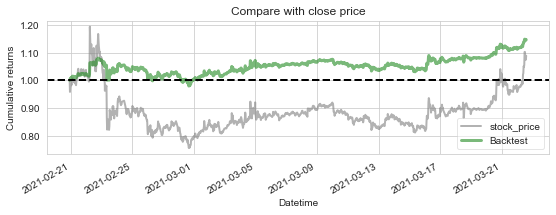

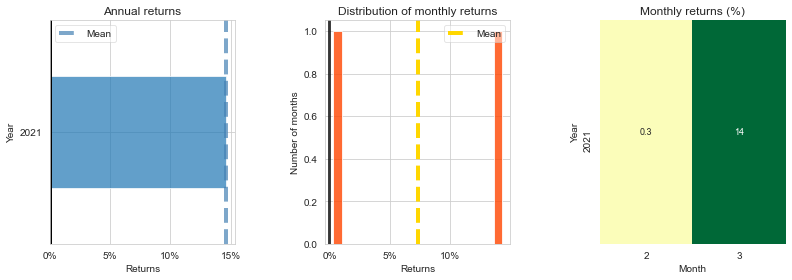

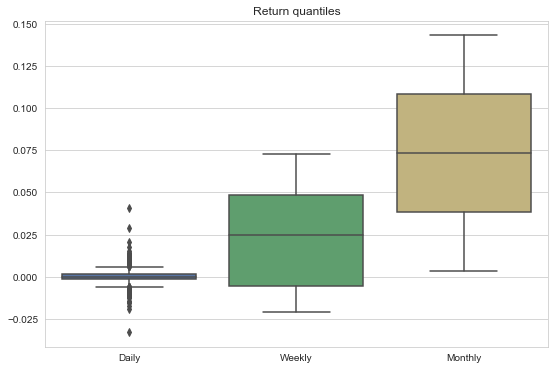

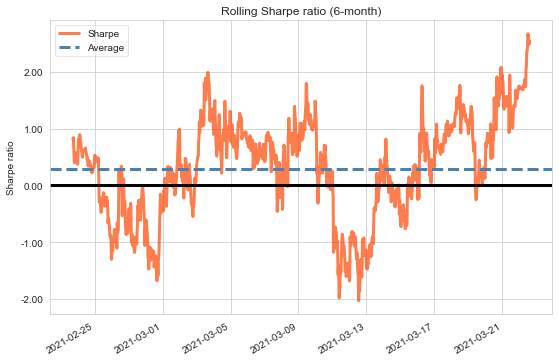

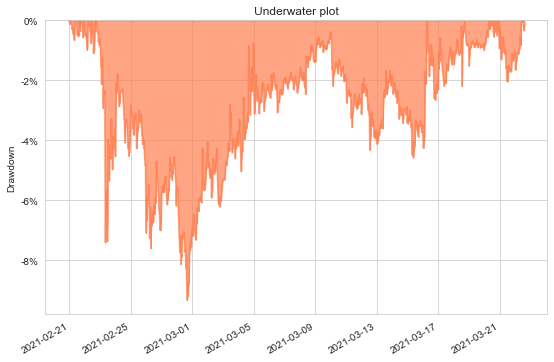

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')